In [136]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import math
import h5py

In [137]:
fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


# I. Data check

In [151]:
df=pd.read_csv('TECAN_210827.csv',delimiter=',',index_col=0)  

## Cycle Nr. to add Kan: 12, 23, 34

In [152]:
t_array = df.to_numpy()[0]/60; # in min; 
print(t_array[11])
print(t_array[22])
print(t_array[33])

63.35666666666667
126.75833333333334
189.9


## check temperature

Text(0, 0.5, 'Temperature (C)')

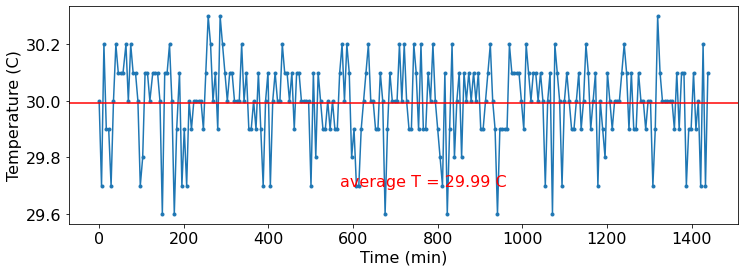

In [153]:
def f_constant(x,c):
    return c
xdata = df.to_numpy()[0]/60;
ydata = df.to_numpy()[1];
param, cov = curve_fit(f_constant, xdata[1:], ydata[1:])
av_T = str(param[0])[:5]
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata, '.-')
plt.axhline(param[0],color='r')
plt.text(570, 29.7, 'average T = '+av_T+' C', color='red')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (C)')

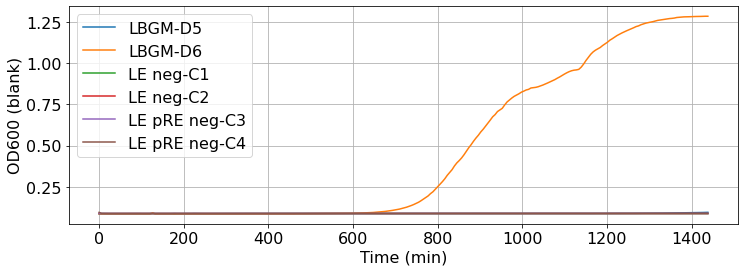

In [154]:
xdata = df.to_numpy()[0]/60;
ydata1 = df.loc['D5'].to_numpy()
ydata2 = df.loc['D6'].to_numpy()
ydata3 = df.loc['C1'].to_numpy()
ydata4 = df.loc['C2'].to_numpy()
ydata5 = df.loc['C3'].to_numpy()
ydata6 = df.loc['C4'].to_numpy()
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata1,label='LBGM-D5')
plt.plot(xdata, ydata2,label='LBGM-D6')
plt.plot(xdata, ydata3,label='LE neg-C1')
plt.plot(xdata, ydata4,label='LE neg-C2')
plt.plot(xdata, ydata5,label='LE pRE neg-C3')
plt.plot(xdata, ydata6,label='LE pRE neg-C4')
plt.xlabel('Time (min)')
plt.ylabel('OD600 (blank)')
plt.grid('on')
plt.legend()

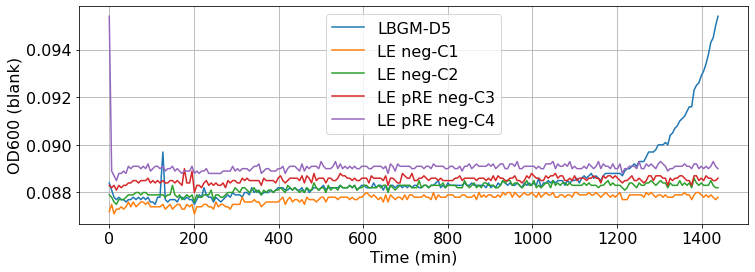

In [155]:
xdata = df.to_numpy()[0]/60;
ydata1 = df.loc['D5'].to_numpy()
ydata2 = df.loc['D6'].to_numpy()
ydata3 = df.loc['C1'].to_numpy()
ydata4 = df.loc['C2'].to_numpy()
ydata5 = df.loc['C3'].to_numpy()
ydata6 = df.loc['C4'].to_numpy()
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata1,label='LBGM-D5')
#plt.plot(xdata, ydata2,label='LBGM-D6')
plt.plot(xdata, ydata3,label='LE neg-C1')
plt.plot(xdata, ydata4,label='LE neg-C2')
plt.plot(xdata, ydata5,label='LE pRE neg-C3')
plt.plot(xdata, ydata6,label='LE pRE neg-C4')
plt.xlabel('Time (min)')
plt.ylabel('OD600 (blank)')
plt.grid('on')
plt.legend()

Text(0.5, 1.0, 'LE392')

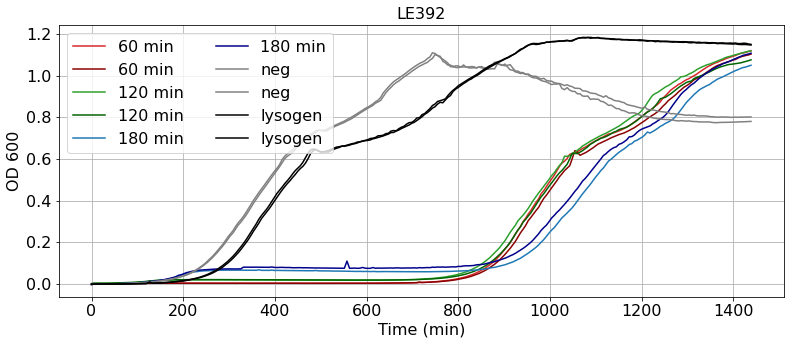

In [156]:
idx = np.arange(2,8,1);
idx = np.concatenate((idx, np.array([20,21,18,19])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx] - np.mean(df.loc[['C1','C2','C3','C4']].to_numpy(), axis=0)
#labels = df.index[idx].to_list()
labels = ['60 min','60 min','120 min', '120 min', '180 min', '180 min','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']
time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2,loc='upper left')
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('LE392')

Text(0.5, 1.0, 'LE392 p(PRM-GFP)')

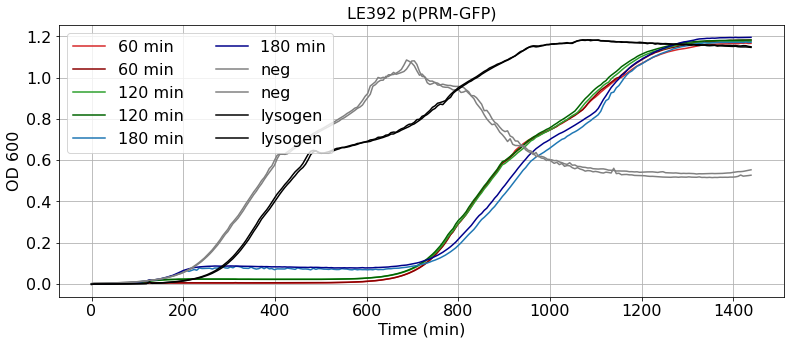

In [157]:
idx = np.arange(8,14,1);
idx = np.concatenate((idx, np.array([22,23,18,19])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]- np.mean(df.loc[['C1','C2','C3','C4']].to_numpy(), axis=0)
labels = ['60 min','60 min','120 min', '120 min', '180 min', '180 min','neg','neg','lysogen','lysogen'];  
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('LE392 p(PRM-GFP)')

Text(0.5, 1.0, 'Kan@60 min')

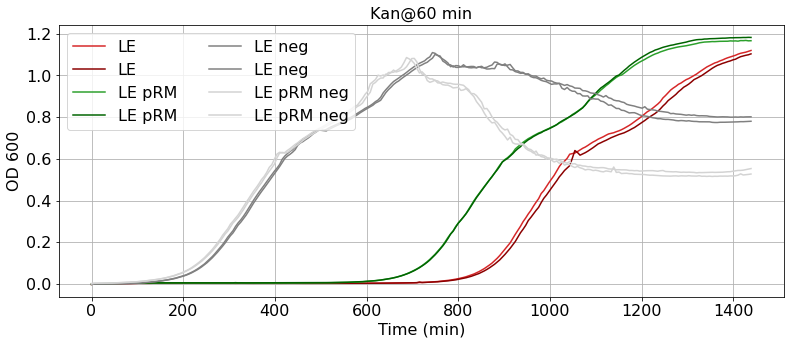

In [161]:
idx = np.array([2,3,8,9]);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]- np.mean(df.loc[['C1','C2','C3','C4']].to_numpy(), axis=0)
labels = ['LE','LE','LE pRM', 'LE pRM','LE neg','LE neg', 'LE pRM neg','LE pRM neg']; 
colors = ['tab:red','darkred','tab:green','darkgreen','grey','grey','lightgrey','lightgrey']; 

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2, loc='upper left')
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('Kan@60 min')

Text(0.5, 1.0, 'Kan@120 min')

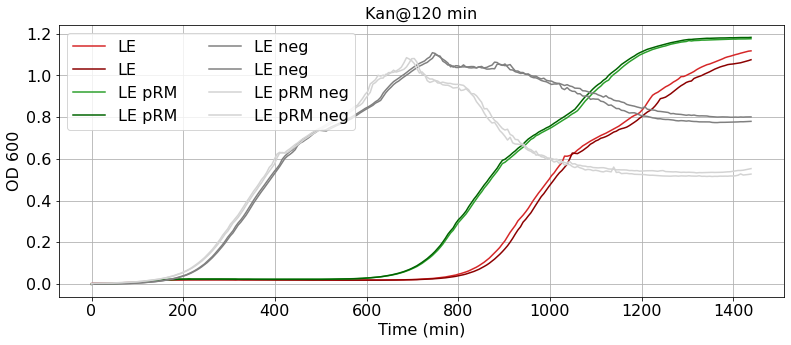

In [162]:
idx = np.array([4,5,10,11]);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]- np.mean(df.loc[['C1','C2','C3','C4']].to_numpy(), axis=0)
labels = ['LE','LE','LE pRM', 'LE pRM','LE neg','LE neg', 'LE pRM neg','LE pRM neg']; 
colors = ['tab:red','darkred','tab:green','darkgreen','grey','grey','lightgrey','lightgrey']; 

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2, loc='upper left')
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('Kan@120 min')
#plt.xlim((250,350))

Text(0.5, 1.0, 'Kan@180 min')

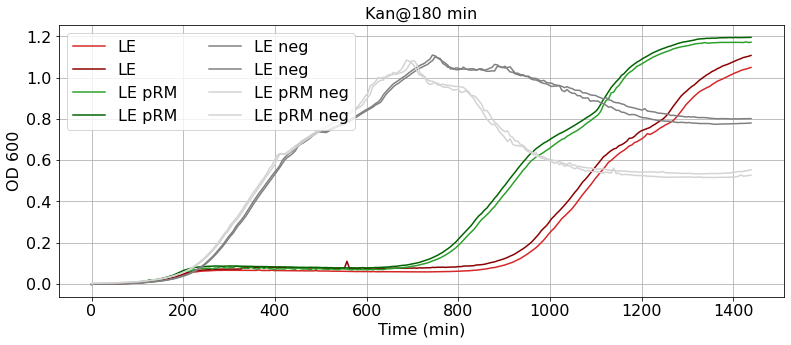

In [163]:
idx = np.array([6,7,12,13]);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]- np.mean(df.loc[['C1','C2','C3','C4']].to_numpy(), axis=0)
labels = ['LE','LE','LE pRM', 'LE pRM','LE neg','LE neg', 'LE pRM neg','LE pRM neg']; 
colors = ['tab:red','darkred','tab:green','darkgreen','grey','grey','lightgrey','lightgrey']; 

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2, loc='upper left')
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('Kan@180 min')

## reproducibility check

In [164]:
df0=pd.read_csv('TECAN_210826.csv',delimiter=',',index_col=0)  

Text(0.5, 1.0, 'Kan@60 min')

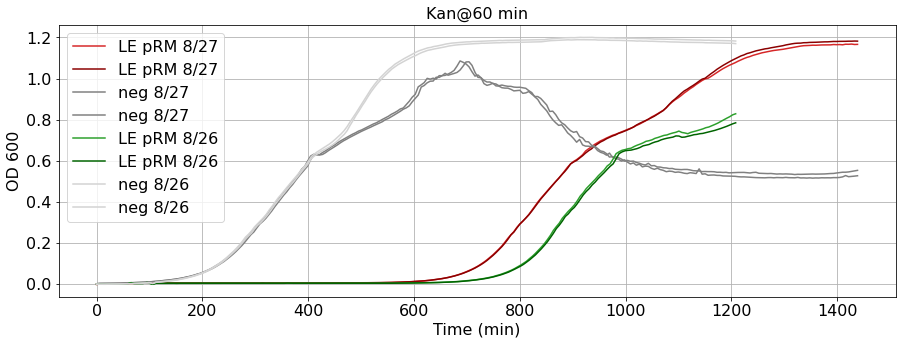

In [165]:
idx = np.array([8,9]);
idx = np.concatenate((idx, np.array([22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]- np.mean(df.loc[['C1','C2','C3','C4']].to_numpy(), axis=0)
labels = ['LE pRM 8/27', 'LE pRM 8/27', 'neg 8/27','neg 8/27']; 
colors = ['tab:red','darkred','grey','grey','lightgrey','lightgrey']; 

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (15,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
    

labels = ['LE pRM 8/26', 'LE pRM 8/26', 'neg 8/26','neg 8/26']; 
colors = ['tab:green','darkgreen', 'lightgrey','lightgrey'];
time = df0.to_numpy()[0]/60
idx = np.array([16,17,20,21]);
empty_sample = df0.to_numpy()[idx]-df0.loc['D5'].to_numpy()
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])    

plt.legend(ncol=1, loc='upper left')
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('Kan@60 min')

# II. Growth rate estimation

In [239]:
def get_linear_range(time, data, start_thresh, R_square_thresh, plot_yes):
    R_square_thresh = 0.999; 
    
    # skip nan
    start_idx = 0; 
    tmp = np.where(np.isnan(data)==True)[0]
    if len(tmp) > 0:
        start_idx = tmp[-1]
        
    # skip low values
    tmp = np.where(data >= np.log2(start_thresh))[0]
    if len(tmp) > 0:
        start_idx = max(start_idx, tmp[0])
        
    # choose starting point
    end_idx = min(start_idx+200, len(data)); 
    starting_idx = np.arange(start_idx,end_idx,1);
#    print(start_idx)
#    print(end_idx)
    R_square0 = np.array([]);
    for j in starting_idx:
        xdata = time[j:j+12];
        ydata = data[j:j+12];
        slope, intercept, r_value, _, _ = linregress(xdata, ydata);
        R_square0 = np.append(R_square0, r_value);
    
    if (len(np.where(R_square0>R_square_thresh)[0]) == 0):
        print('fail to find starting points: please lower R_square_thresh');
        return np.array([0,0])
    else:
        j_0 = starting_idx[np.where(R_square0>R_square_thresh)[0][0]];
    
        # choose number of fitting points
        R_square = np.array([]);
        max_points_allowed = len(data)-j_0;
        if max_points_allowed == 0:
            print('fail to find #fitting points: please lower R_square_thresh');
            return np.array([0,0])
        else:
            if max_points_allowed <= 20: #what about = 0? 
                fitting_points = np.array([max_points_allowed]);
            else:
                fitting_points = np.arange(20,min(40,max_points_allowed),1);
            for j in fitting_points:
                xdata = time[j_0:j_0+j];
                ydata = data[j_0:j_0+j];
                slope, intercept, r_value, _, _ = linregress(xdata, ydata);
                R_square = np.append(R_square, r_value);
            tmp2 = np.argmax(R_square);
            j = fitting_points[tmp2]; 
            if plot_yes == True:
                plt.rcParams["figure.figsize"] = (8,7)
                subplot(2,1,1)
                plt.plot(starting_idx, R_square0,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j_0,color='k',alpha = 0.5);
                plt.xlabel('index of fitting start point')
                plt.ylabel('R squared')
                plt.grid(True)
                subplot(2,1,2)
                plt.plot(fitting_points, R_square,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j,color='k',alpha = 0.5);
                plt.xlabel('number of fitting points')
                plt.ylabel('R squared')
                plt.grid(True)
                plt.tight_layout()
            return np.array([j_0, j]);
    

<ipython-input-241-1b1fcdf47fc8>:17: RuntimeWarning: invalid value encountered in log2
  get_linear_range(time, np.log2(df.to_numpy()[11]-ave_blank), 0.01, 0.999, 1)


array([116,  25])

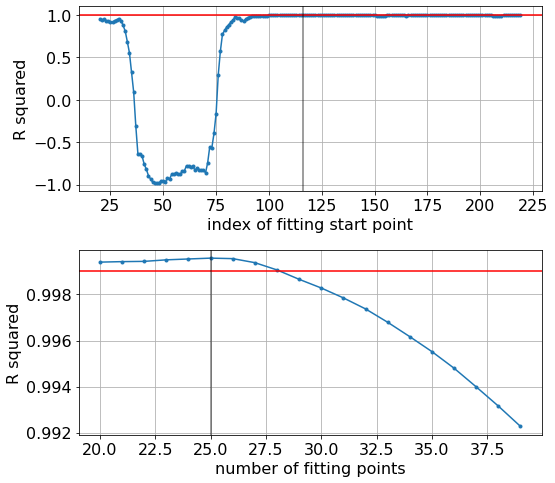

In [241]:
LE_60 = np.array([2,3])
LE_120 = np.array([4,5])
LE_180 = np.array([6,7])
PRM_60 = np.array([8,9])
PRM_120 = np.array([10,11])
PRM_180 = np.array([12,13])
idx_blank = np.array([14,15,16,17])
idx_lys = np.array([18,19])
LE_neg = np.array([20,21])
pRM_neg = np.array([22,23])

time = df.to_numpy()[0]/60

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)


get_linear_range(time, np.log2(df.to_numpy()[11]-ave_blank), 0.01, 0.999, 1)

In [224]:
sample_d = {};

class Sample:
    def __init__(self, name, sample_idx, growth_rate,N0):
        self.sample_name = name
        self.sample_idx = sample_idx
        self.growth_rate = growth_rate
        self.N0 = N0

<ipython-input-253-97d5ba20c241>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-253-97d5ba20c241>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-253-97d5ba20c241>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/turt

Text(0.5, 1.0, 'LE392')

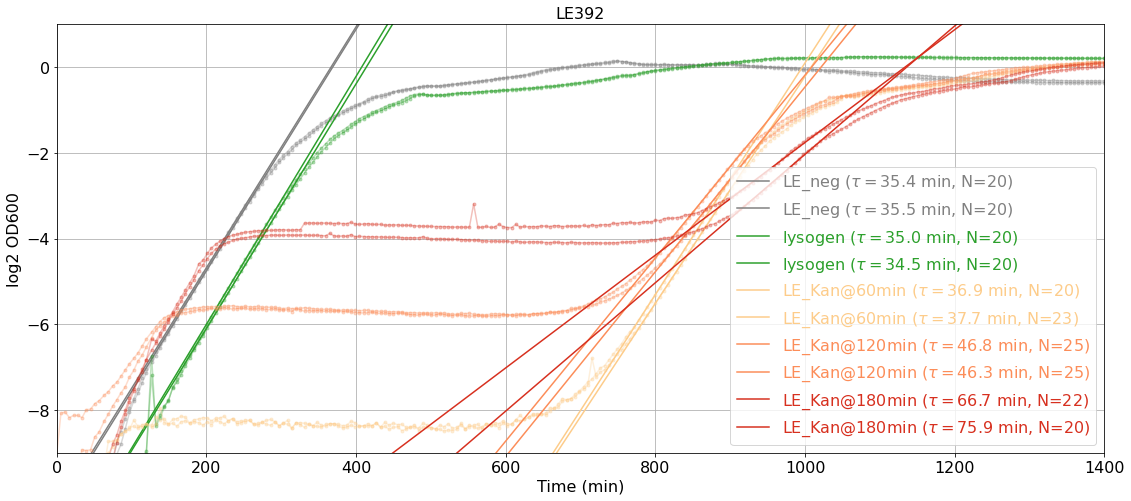

In [253]:
LE_60 = np.array([2,3])
LE_120 = np.array([4,5])
LE_180 = np.array([6,7])
PRM_60 = np.array([8,9])
PRM_120 = np.array([10,11])
PRM_180 = np.array([12,13])
idx_blank = np.array([14,15,16,17])
idx_lys = np.array([18,19])
LE_neg = np.array([20,21])
pRM_neg = np.array([22,23])

plt.rcParams["figure.figsize"] = (16,7)
k = 0;
labels = ['LE_neg','lysogen','LE_Kan@60min','LE_Kan@120min','LE_Kan@180min'];
colors = ['grey','tab:green','#fdcc8a','#fc8d59','#d7301f'];
for i in (LE_neg, idx_lys, LE_60, LE_120, LE_180):
    sample = np.log2(df.to_numpy()[i]-ave_blank);
    min_j0 = 1e4;
    max_j = 0; 
    for kk in range(0,len(sample)):
        data = sample[kk,:];
        array_tmp = get_linear_range(time, data, 0.015, 0.999, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        if j_0 < min_j0:
            min_j0 = j_0; 
        if j+j_0 > max_j:
            max_j = j+j_0; 
        xdata = time[j_0:j_0+j];
        ydata = data[j_0:j_0+j];
        slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
        sample_d[i[kk]] = Sample(labels[k], i[kk], 1/slope, intercept);         
        generation_time = str(1/slope)[:4]; 
        plt.plot(time, data, '.-',color = colors[k], alpha=0.3);
        plt.plot(time, slope*time+intercept, '-', color = colors[k], \
                 label=labels[k]+' ('+r'$\tau=$'+generation_time+' min,'+' N='+str(j)+')')
#        plt.axvspan(time[j_0], time[j_0+j], facecolor=colors[k], alpha=0.05)
    k = k+1; 
plt.xlim((0,1400))
plt.ylim((-9,1))
plt.legend(labelcolor='linecolor',ncol=1); plt.grid(True);
plt.ylabel('log2 OD600'); plt.xlabel('Time (min)')
plt.tight_layout()
plt.title('LE392')

<ipython-input-252-751984c85364>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-252-751984c85364>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_s

Text(0.5, 1.0, 'LE392 p(pRM-gfp)')

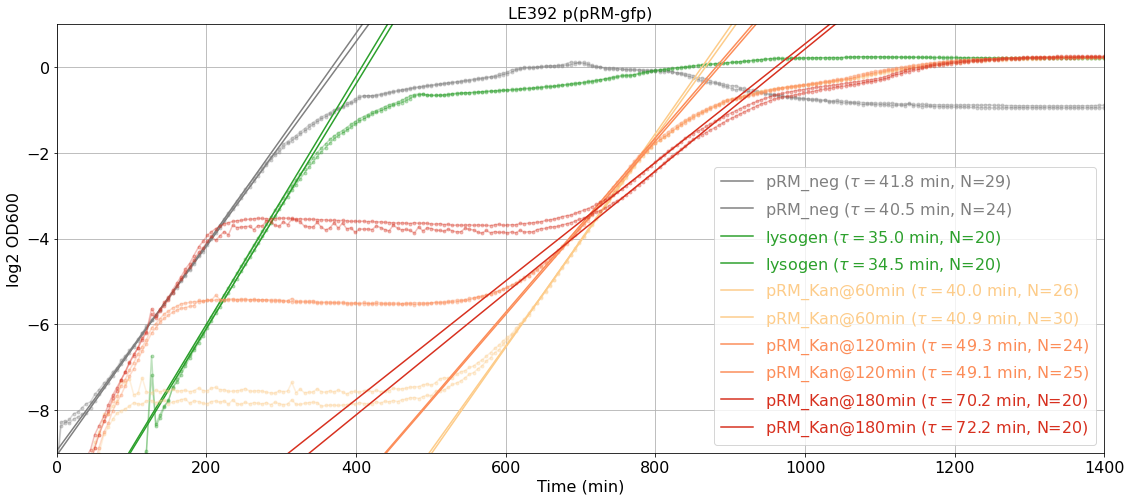

In [252]:
LE_60 = np.array([2,3])
LE_120 = np.array([4,5])
LE_180 = np.array([6,7])
PRM_60 = np.array([8,9])
PRM_120 = np.array([10,11])
PRM_180 = np.array([12,13])
idx_blank = np.array([14,15,16,17])
idx_lys = np.array([18,19])
LE_neg = np.array([20,21])
pRM_neg = np.array([22,23])

plt.rcParams["figure.figsize"] = (16,7)
k = 0;
labels = ['pRM_neg','lysogen','pRM_Kan@60min','pRM_Kan@120min','pRM_Kan@180min'];
colors = ['grey','tab:green','#fdcc8a','#fc8d59','#d7301f'];
for i in (pRM_neg, idx_lys, PRM_60, PRM_120, PRM_180):
    sample = np.log2(df.to_numpy()[i]-ave_blank);
    min_j0 = 1e4;
    max_j = 0; 
    for kk in range(0,len(sample)):
        data = sample[kk,:];
        if i[kk] in PRM_180:
            array_tmp = get_linear_range(time, data, 0.08, 0.999, 0);
        else:
            array_tmp = get_linear_range(time, data, 0.015, 0.999, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        if j_0 < min_j0:
            min_j0 = j_0; 
        if j+j_0 > max_j:
            max_j = j+j_0; 
        xdata = time[j_0:j_0+j];
        ydata = data[j_0:j_0+j];
        slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
        sample_d[i[kk]] = Sample(labels[k], i[kk], 1/slope, intercept);         
        generation_time = str(1/slope)[:4]; 
        plt.plot(time, data, '.-',color = colors[k], alpha=0.3);
        plt.plot(time, slope*time+intercept, '-', color = colors[k], \
                 label=labels[k]+' ('+r'$\tau=$'+generation_time+' min,'+' N='+str(j)+')')
#        plt.axvspan(time[j_0], time[j_0+j], facecolor=colors[k], alpha=0.05)
    k = k+1; 
plt.xlim((0,1400))
plt.ylim((-9,1))
plt.legend(labelcolor='linecolor',ncol=1); plt.grid(True);
plt.ylabel('log2 OD600'); plt.xlabel('Time (min)')
plt.tight_layout()
plt.title('LE392 p(pRM-gfp)')

Text(0, 0.5, 'doubling time (min)')

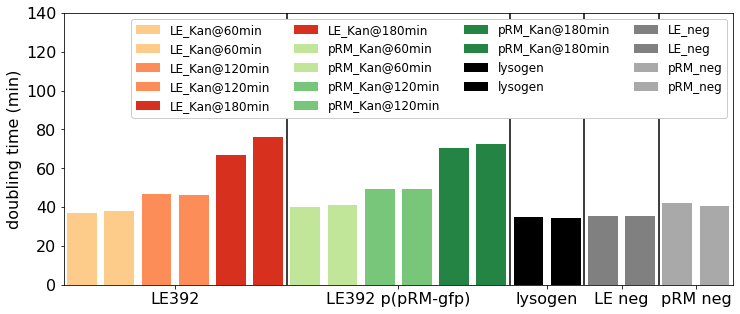

In [267]:
colors_d = {
    'lysogen': 'black',
    'LE_neg': 'grey', 
    'LE_Kan@60min': '#fdcc8a',
    'LE_Kan@120min': '#fc8d59',
    'LE_Kan@180min': '#d7301f',
    'pRM_neg': 'darkgrey',
    'pRM_Kan@60min': '#c2e699',
    'pRM_Kan@120min': '#78c679',
    'pRM_Kan@180min': '#238443'
}


kk = 0;
xdata = [];
labels = [];
plt.rcParams["figure.figsize"] = (12,5)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen':
        name = "lysogen    ";
    elif name =='LE_neg':
        name = "LE_neg, no Kan"
    elif name =='pRM_neg':
        name = "pRM_neg, no Kan"  
    plt.bar(kk, sample_d[i].growth_rate, color=color,label=sample_d[i].sample_name)
    labels.append(name); 
    xdata.append(kk+1);
#    ydata = np.append(ydata, sample_d[i].growth_rate)
    kk = kk+1;
#plt.grid(True)

plt.axvline(5.5,color='black')
plt.axvline(11.5,color='black')
plt.axvline(13.5,color='black')
plt.axvline(15.5,color='black')
plt.ylim((0,140))
plt.xlim((-0.5,17.5))
plt.legend(fontsize=12,ncol=4,framealpha=1)
plt.xticks([2.5,8.5,12.5,14.5, 16.5],['LE392','LE392 p(pRM-gfp)','lysogen','LE neg','pRM neg']); 
plt.ylabel('doubling time (min)')
#plt.grid(True)

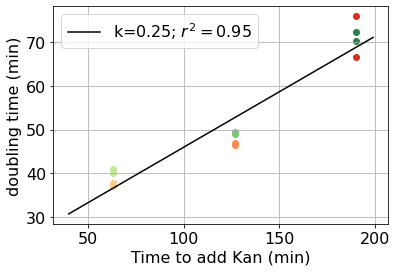

In [273]:
kk = 0;
xdata = [];
ydata = [];
labels = [];
plt.rcParams["figure.figsize"] = (6,4)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    x_ = 0; 
    if "Kan@60min" in name:
        x_ = 63;
    elif "Kan@120min" in name:
        x_ = 127;
    elif "Kan@180min" in name:
        x_ = 190; 
    if i in [14,15,16,17,18,19,20,21,22,23]:
        next;
    else:
        plt.scatter(x_, sample_d[i].growth_rate, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(sample_d[i].growth_rate)
        kk = kk+1;
    
slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
x_data = np.arange(40,200,1)
plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
#plt.ylim((32,48))
plt.legend(loc='upper left')
plt.ylabel('doubling time (min)')
plt.xlabel('Time to add Kan (min)')
plt.grid(True)

Text(0.5, 1.0, 'LE392')

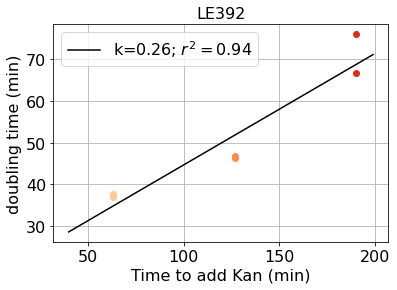

In [276]:
kk = 0;
xdata = [];
ydata = [];
labels = [];
plt.rcParams["figure.figsize"] = (6,4)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    x_ = 0; 
    if "Kan@60min" in name:
        x_ = 63;
    elif "Kan@120min" in name:
        x_ = 127;
    elif "Kan@180min" in name:
        x_ = 190; 
    if i in [14,15,16,17,18,19,20,21,22,23]:
        next;
    elif "pRM" in name:
        next;
    else:
        plt.scatter(x_, sample_d[i].growth_rate, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(sample_d[i].growth_rate)
        kk = kk+1;
    
slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
x_data = np.arange(40,200,1)
plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
#plt.ylim((32,48))
plt.legend(loc='upper left')
plt.ylabel('doubling time (min)')
plt.xlabel('Time to add Kan (min)')
plt.grid(True)
plt.title('LE392')

Text(0.5, 1.0, 'LE392 p(pRM-gfp)')

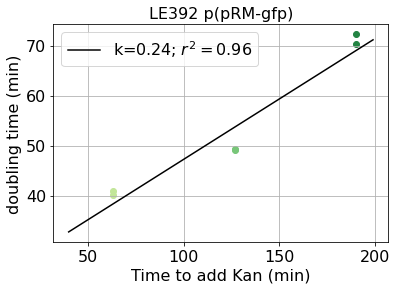

In [277]:
kk = 0;
xdata = [];
ydata = [];
labels = [];
plt.rcParams["figure.figsize"] = (6,4)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    x_ = 0; 
    if "Kan@60min" in name:
        x_ = 63;
    elif "Kan@120min" in name:
        x_ = 127;
    elif "Kan@180min" in name:
        x_ = 190; 
    if i in [14,15,16,17,18,19,20,21,22,23]:
        next;
    elif "LE_" in name:
        next;
    else:
        plt.scatter(x_, sample_d[i].growth_rate, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(sample_d[i].growth_rate)
        kk = kk+1;
    
slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
x_data = np.arange(40,200,1)
plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
#plt.ylim((32,48))
plt.legend(loc='upper left')
plt.ylabel('doubling time (min)')
plt.xlabel('Time to add Kan (min)')
plt.grid(True)
plt.title('LE392 p(pRM-gfp)')

## combine 08/26 data

In [318]:
df0=pd.read_csv('TECAN_210826.csv',delimiter=',',index_col=0)  
sample_d0 = {};

idx_blank = np.array([24,25]);
idx_30 = np.array([14,15]);
idx_60 = np.array([16,17]);
idx_90 = np.array([18,19]);
idx_neg = np.array([20,21]);
idx_lys = np.array([22,23]);

time = df0.to_numpy()[0]/60

ave_blank = np.mean(df0.to_numpy()[idx_blank],axis=0)

plt.rcParams["figure.figsize"] = (18,8.5)
k = 0;
labels = ['neg','lysogen','MOI=10, Kan@30min','MOI=10, Kan@60min','MOI=10, Kan@90min'];
colors = ['grey','black','#fdcc8a','#fc8d59','#d7301f','tab:green'];
for i in (idx_neg, idx_lys, idx_30, idx_60, idx_90):
    sample = np.log2(df0.to_numpy()[i]-ave_blank);
    min_j0 = 1e4;
    max_j = 0; 
    for kk in range(0,len(sample)):
        data = sample[kk,:];
        array_tmp = get_linear_range(time, data, 0.015, 0.999, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        if j_0 < min_j0:
            min_j0 = j_0; 
        if j+j_0 > max_j:
            max_j = j+j_0; 
        xdata = time[j_0:j_0+j];
        ydata = data[j_0:j_0+j];
        slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
        sample_d0[i[kk]] = Sample(labels[k], i[kk], 1/slope, intercept);         
        generation_time = str(1/slope)[:4]; 
    k = k+1; 

<ipython-input-318-80a330112057>:20: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df0.to_numpy()[i]-ave_blank);
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0.5, 1.0, 'LE392 p(pRM-gfp)')

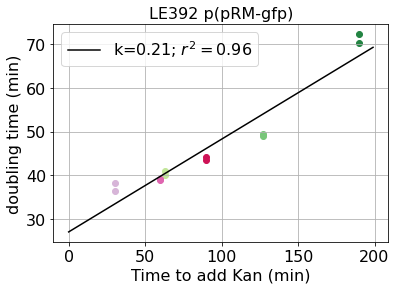

In [321]:
xdata = [];
ydata = [];
labels = [];
plt.rcParams["figure.figsize"] = (6,4)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    x_ = 0; 
    if "Kan@60min" in name:
        x_ = 63;
    elif "Kan@120min" in name:
        x_ = 127;
    elif "Kan@180min" in name:
        x_ = 190; 
    if i in [14,15,16,17,18,19,20,21,22,23]:
        next;
    elif "LE_" in name:
        next;
    else:
        plt.scatter(x_, sample_d[i].growth_rate, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(sample_d[i].growth_rate)

colors_d0 = {
    'lysogen': 'black',
    'neg': 'grey',
    'MOI=0.1, Kan@30min': '#b2e2e2',
    'MOI=0.1, Kan@60min': '#66c2a4',
    'MOI=0.1, Kan@90min':'#238b45',
    'MOI=1, Kan@30min': '#fdcc8a',
    'MOI=1, Kan@60min': '#fc8d59',
    'MOI=1, Kan@90min':'#d7301f',
    'MOI=10, Kan@30min': '#d7b5d8',
    'MOI=10, Kan@60min': '#df65b0',
    'MOI=10, Kan@90min':'#ce1256'
}        
        

for i in sorted(sample_d0.keys()):
    name = sample_d0[i].sample_name
    color = colors_d0[name]; 
    if "Kan@30min" in name:
        x_ = 30;
    elif "Kan@60min" in name:
        x_ = 60;
    elif "Kan@90min" in name:
        x_ = 90; 
    if "Kan@" in name: 
        plt.scatter(x_, sample_d0[i].growth_rate, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(sample_d0[i].growth_rate)
    else:
        next; 
    
slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
x_data = np.arange(0,200,1)
plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
#plt.ylim((32,48))
plt.legend(loc='upper left')
plt.ylabel('doubling time (min)')
plt.xlabel('Time to add Kan (min)')
plt.grid(True)
plt.title('LE392 p(pRM-gfp)')

## check N0

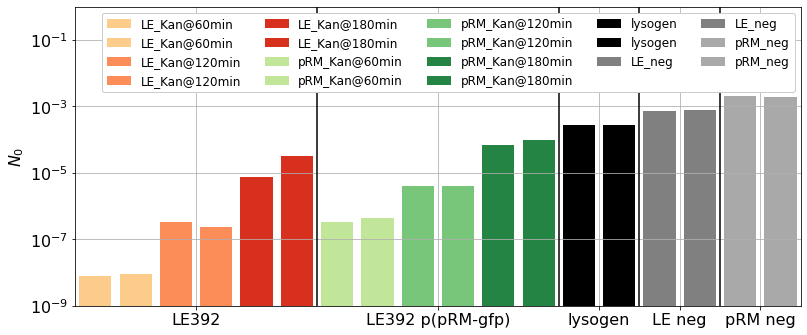

In [288]:
kk = 0;
xdata = [];
labels = [];
plt.rcParams["figure.figsize"] = (13,5.5)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen':
        name = "lysogen    ";
    elif name =='LE_neg':
        name = "LE_neg, no Kan"
    elif name =='pRM_neg':
        name = "pRM_neg, no Kan"  
    plt.bar(kk, np.power(2,sample_d[i].N0), color=color,label=sample_d[i].sample_name)
    labels.append(name); 
    xdata.append(kk+1);
#    ydata = np.append(ydata, sample_d[i].growth_rate)
    kk = kk+1;


plt.axvline(5.5,color='black')
plt.axvline(11.5,color='black')
plt.axvline(13.5,color='black')
plt.axvline(15.5,color='black')
plt.ylim((1e-9,1))
plt.yscale('log')
plt.xlim((-0.5,17.5))
plt.legend(fontsize=12,ncol=5,framealpha=1)
plt.xticks([2.5,8.5,12.5,14.5, 16.5],['LE392','LE392 p(pRM-gfp)','lysogen','LE neg','pRM neg']); 
plt.ylabel('$N_0$')
plt.grid(True)


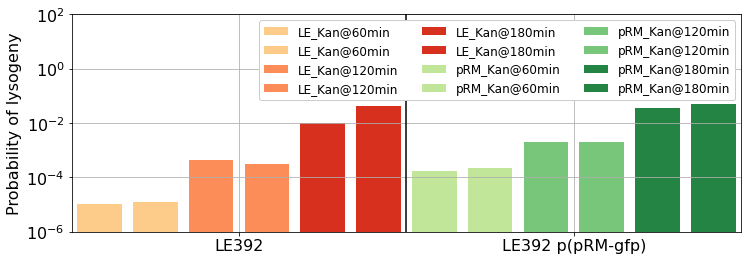

In [308]:
xdata = [];
ydata = []; 
labels = [];

LE_N0 = np.array([]);
for i in LE_neg:
    LE_N0 = np.append(LE_N0, np.power(2,sample_d[i].N0));
    
pRM_N0 = np.array([]);
for i in pRM_neg:
    pRM_N0 = np.append(pRM_N0, np.power(2,sample_d[i].N0));

plt.rcParams["figure.figsize"] = (12,4)

kk = 0;
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen' or 'neg' in name:
        next;
    elif 'LE' in name:
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(LE_N0); 
        plt.bar(kk, ratio, color=color,label=sample_d[i].sample_name)
        labels.append(name);
        kk = kk+1;
    elif 'pRM' in name:
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(pRM_N0); 
        plt.bar(kk, ratio, color=color,label=sample_d[i].sample_name)
        labels.append(name);
        kk = kk+1;

plt.ylim((1e-6,100))
plt.yscale('log')
plt.xlim((-0.5,11.5))
plt.legend(fontsize=12,ncol=3,framealpha=1)
plt.xticks([2.5,8.5],['LE392','LE392 p(pRM-gfp)']); 
plt.axvline(5.5,color='black')
plt.ylabel('Probability of lysogeny')
plt.grid(True)

Text(0.5, 1.0, 'LE392')

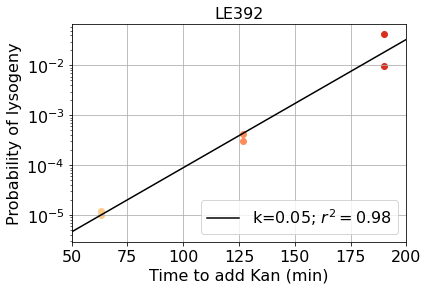

In [306]:
xdata = [];
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "Kan@60min" in name:
        x_ = 63;
    elif "Kan@120min" in name:
        x_ = 127;
    elif "Kan@180min" in name:
        x_ = 190; 

    if i in [14,15,16,17,18,19,20,21,22,23]:
        next;
    elif 'LE' in name:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
def model2(t,c,kd):
    return c*(1-np.exp(-kd*t))

slope, intercept, r_value, _, stderr = linregress(xdata, np.log(ydata));
plt.plot(x_data, np.exp(slope*x_data+intercept), 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
x_data = np.arange(50,200,0.01)
xdata = np.array(xdata); ydata=np.array(ydata);
popt, pcov = curve_fit(model2, xdata, ydata,p0=[0.1,1/120])
residuals = ydata - model2(xdata, *popt); 
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)


plt.yscale('log')
plt.xlim((50,200))
plt.xlabel('Time to add Kan (min)')
plt.legend(loc='lower right')
plt.ylabel('Probability of lysogeny')
plt.grid(True)
plt.title('LE392')

Text(0.5, 1.0, 'LE392 p(pRM-gfp)')

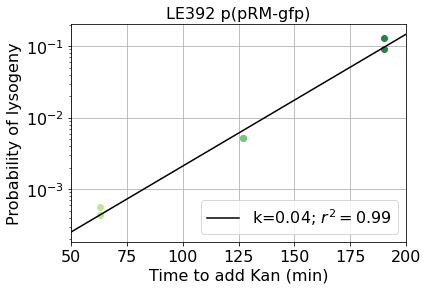

In [307]:
xdata = [];
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "Kan@60min" in name:
        x_ = 63;
    elif "Kan@120min" in name:
        x_ = 127;
    elif "Kan@180min" in name:
        x_ = 190; 

    if i in [14,15,16,17,18,19,20,21,22,23]:
        next;
    elif 'pRM' in name:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
def model2(t,c,kd):
    return c*(1-np.exp(-kd*t))

slope, intercept, r_value, _, stderr = linregress(xdata, np.log(ydata));
plt.plot(x_data, np.exp(slope*x_data+intercept), 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
x_data = np.arange(50,200,0.01)
xdata = np.array(xdata); ydata=np.array(ydata);
popt, pcov = curve_fit(model2, xdata, ydata,p0=[0.1,1/120])
residuals = ydata - model2(xdata, *popt); 
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)


plt.yscale('log')
plt.xlim((50,200))
plt.xlabel('Time to add Kan (min)')
plt.legend(loc='lower right')
plt.ylabel('Probability of lysogeny')
plt.grid(True)
plt.title('LE392 p(pRM-gfp)')